C 편의점, 거리: 61.68468205316454
A 편의점, 거리: 69.20260110718382
B 편의점, 거리: 75.58438992278762
F 편의점, 거리: 86.02325267042627
G 편의점, 거리: 87.5728268357257
J 편의점, 거리: 95.85927185202274
D 편의점, 거리: 97.74456506629922
H 편의점, 거리: 97.75479527879949
I 편의점, 거리: 102.48902380255166
E 편의점, 거리: 117.06835610018618



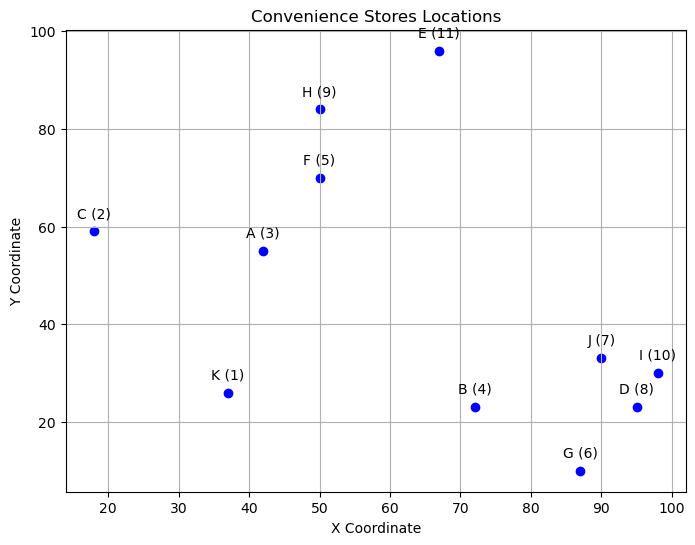

프로그램 실행 시간: 0.1521294116973877 초


In [100]:
import random
import math
import time
import matplotlib.pyplot as plt

## 클래스와 함수 선언 부분 ##
class Node():
    def __init__(self):
        self.data = None
        self.link = None

def printStores(start):
    current = start
    if current == None:
        return

    while current.link != head:
        current = current.link
        x, y = current.data[1:]
        print(current.data[0], '편의점, 거리:', math.sqrt(x*x + y*y))
    print()

def  makeStoreList(store):
    global memory, head, current, pre

    node = Node()
    node.data = store
    memory.append(node)

    if head == None: # 첫 번째 편의점
        head = node
        node.link = head
        return

    # 새 편의점이 첫 번째 편의점보다 가까우면 첫 편의점으로 만듦
    nodeX, nodeY = node.data[1:]
    nodeDist = math.sqrt(nodeX*nodeX + nodeY*nodeY)
    headX, headY = head.data[1:]
    headDist = math.sqrt(headX*headX + headY*headY)

    if headDist > nodeDist:    # 헤드 앞에 삽입
        node.link = head
        last = head
        while last.link != head:
            last = last.link
        last.link = node
        head = node
        return

    current = head    # 중간에 데이터를 넣을 경우
    while current.link != head:
        pre = current
        current = current.link
        currX, currY = current.data[1:]
        currDist = math.sqrt(currX*currX + currY*currY)
        if currDist > nodeDist:
            pre.link = node
            node.link = current
            return

    current.link = node
    node.link = head


## 전역 변수 선언 부분 ##
memory = []
head, current, pre = None, None, None

## 메인 코드 부분 ##
if __name__ == "__main__":

    start_time = time.time()

    storeArray = []
    storeName = 'A'
    for _ in range(11):
        store = (storeName, random.randint(1, 100), random.randint(1, 100))
        storeArray.append(store)
        storeName = chr(ord(storeName) + 1)    # 편의점 이름을 A->B->C… 으로 변경

    for store in storeArray:
        makeStoreList(store)

    printStores(head)

    # Matplotlib를 사용하여 편의점 위치를 그래프에 표시
    x_values = []
    y_values = []
    store_names = []

    current = head
    if current is not None:
        while current.link != head:
            current = current.link
            store_names.append(current.data[0])
            x_values.append(current.data[1])
            y_values.append(current.data[2])

    # 마지막 노드(첫 번째 노드) 처리
    store_names.append(head.data[0])
    x_values.append(head.data[1])
    y_values.append(head.data[2])

    # 각 편의점까지의 거리 계산
    distances = [math.sqrt(x**2 + y**2) for x, y in zip(x_values, y_values)]
    # 거리를 기준으로 정렬하여 가까운 순서대로 표시할 인덱스 리스트 생성
    sorted_indexes = sorted(range(len(distances)), key=lambda k: distances[k])

    plt.figure(figsize=(8, 6))
    plt.scatter(x_values, y_values, color='blue', marker='o')
    for i, idx in enumerate(sorted_indexes):
        store_idx = i + 1
        plt.annotate(f'{store_names[idx]} ({store_idx})', (x_values[idx], y_values[idx]), textcoords="offset points", xytext=(0, 10), ha='center')

    plt.title('Convenience Stores Locations')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.grid(True)
    plt.show()
    
    end_time = time.time()
    execution_time = end_time - start_time
    print("프로그램 실행 시간:", execution_time, "초")
